# Solving the n-Queens Problem using Local Search

Student Name: [Add your name]

I have used the following AI tools: [list tools]

I understand that my submission needs to be my own work: [your initials]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

## Helper functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""

    n = len(board)

    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):
    """display the board"""

    n = len(board)

    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap,
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


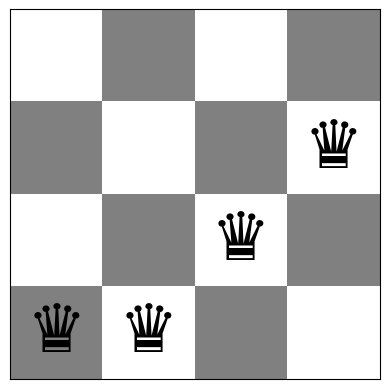

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [ ]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


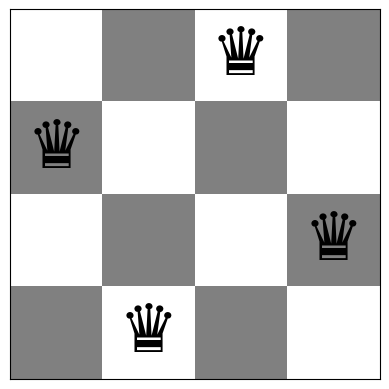

In [ ]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Initial board:
Board with 4 conflicts.


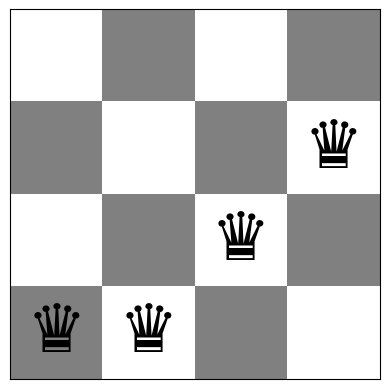

Initial conflicts: 4
Reached local optimum after 1 steps.

Final board:
Board with 1 conflicts.


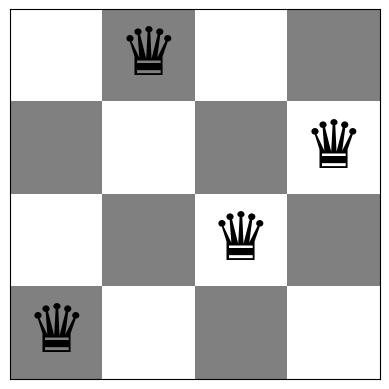

Final conflicts: 1
Queens (left to right) are at rows: [3 0 2 1]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)

def random_board(n):
    """Creates a random board of size n x n. Only one queen per column."""
    return np.random.randint(0, n, size=n)

def comb2(n):
    return n*(n-1)//2

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""
    n = len(board)
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))

def show_board(board, cols=['white', 'gray'], fontsize=48):
    """Display the board."""
    n = len(board)
    display = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            if ((i + j) % 2) != 0:
                display[i, j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap=cmap,
              norm=colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize=fontsize,
                 horizontalalignment='center',
                 verticalalignment='center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

def steepest_ascent_hill_climbing(board):
    current_board = board.copy()
    current_conflicts = conflicts(current_board)
    steps = 0

    while True:
        n = len(current_board)
        best_board = current_board.copy()
        best_conflicts = current_conflicts

        # Xét tất cả các local moves
        for col in range(n):
            for row in range(n):
                if row == current_board[col]:
                    continue  # không di chuyển nếu cùng hàng
                new_board = current_board.copy()
                new_board[col] = row
                new_conflicts = conflicts(new_board)

                # Nếu tìm được trạng thái tốt hơn
                if new_conflicts < best_conflicts:
                    best_conflicts = new_conflicts
                    best_board = new_board.copy()

        # Nếu không có cải thiện nào → đạt local optimum
        if best_conflicts >= current_conflicts:
            print(f"Reached local optimum after {steps} steps.")
            return current_board, current_conflicts

        # Cập nhật trạng thái
        current_board = best_board
        current_conflicts = best_conflicts
        steps += 1

        # Nếu đạt lời giải tối ưu
        if current_conflicts == 0:
            print(f"Found solution after {steps} steps!")
            return current_board, current_conflicts

# --- Run example ---
n = 4
init_board = random_board(n)
print("Initial board:")
show_board(init_board)
print(f"Initial conflicts: {conflicts(init_board)}")

solution_board, solution_conflicts = steepest_ascent_hill_climbing(init_board)

print("\nFinal board:")
show_board(solution_board)
print(f"Final conflicts: {solution_conflicts}")
print(f"Queens (left to right) are at rows: {solution_board}")

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [ ]:
# Code and description go here
import random

def random_board(n):
    """Tạo bàn cờ ngẫu nhiên: board[i] = cột đặt quân hậu ở hàng i"""
    return [random.randint(0, n-1) for _ in range(n)]

def compute_conflicts(board):
    """Tính số cặp quân hậu tấn công nhau"""
    conflicts = 0
    n = len(board)
    for i in range(n):
        for j in range(i+1, n):
            if board[i] == board[j]:            # cùng cột
                conflicts += 1
            elif abs(board[i]-board[j]) == j-i: # cùng đường chéo
                conflicts += 1
    return conflicts

def get_uphill_neighbors(board):
    """Lấy tất cả các neighbor tốt hơn (giảm xung đột)"""
    n = len(board)
    current_conflicts = compute_conflicts(board)
    neighbors = []

    for row in range(n):
        original_col = board[row]
        for col in range(n):
            if col != original_col:
                new_board = board.copy()
                new_board[row] = col
                new_conflicts = compute_conflicts(new_board)
                if new_conflicts < current_conflicts:
                    neighbors.append(new_board)
    return neighbors

def stochastic_hill_climbing(n, max_steps=10000):
    board = random_board(n)
    current_conflicts = compute_conflicts(board)

    for step in range(max_steps):
        if current_conflicts == 0:
            print(f" Solution found at step {step}")
            return board

        neighbors = get_uphill_neighbors(board)
        if not neighbors:
            print(f"⚠ Local optimum reached at step {step}")
            return board

        # Chọn ngẫu nhiên một neighbor tốt hơn
        board = random.choice(neighbors)
        current_conflicts = compute_conflicts(board)

    print(" Max steps reached — solution not found")
    return board

# ---- Chạy thử ----
if __name__ == "__main__":
    n = 8
    solution = stochastic_hill_climbing(n)
    print("Board:", solution)
    print("Conflicts:", compute_conflicts(solution))


⚠ Local optimum reached at step 6
Board: [6, 3, 1, 4, 7, 5, 2, 2]
Conflicts: 1


## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

--- Bắt đầu Task 3: Stochastic Hill Climbing 2 cho 8-Queens ---

Kết quả cuối cùng cho 8-Queens:
Số xung đột cuối cùng: 1
Bàn cờ cuối cùng: [6 3 1 4 7 5 2 2]
Bàn cờ với 1 xung đột.


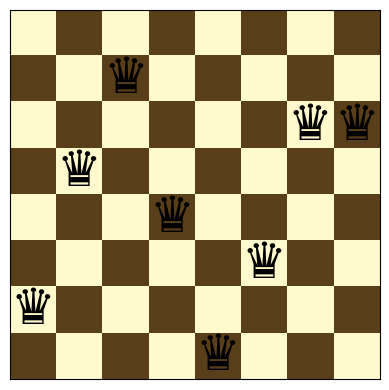

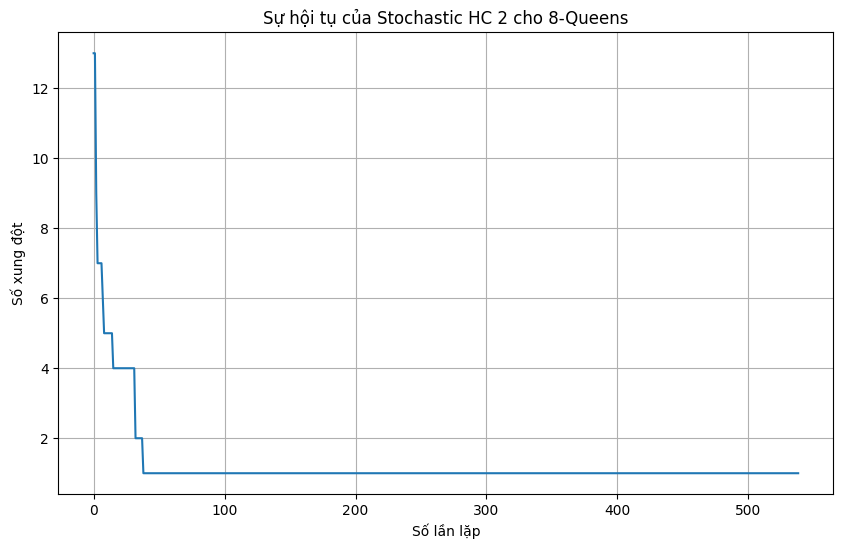

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time

np.random.seed(int(time.time()))

def random_board(n):
    """Tạo một bàn cờ ngẫu nhiên kích thước n x n."""
    return(np.random.randint(0,n, size = n))

def comb2(n):
    """Tính tổ hợp chập 2 của n."""
    return n*(n-1)//2

def conflicts(board):
    """Tính toán số lượng xung đột, tức là hàm mục tiêu."""
    n = len(board)
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * (2 * n - 1)
    diagonal2_cnt = [0] * (2 * n - 1)

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n - 1] += 1

    # Sử dụng map để tính tổng các xung đột
    total_conflicts = sum(map(comb2, horizontal_cnt))
    total_conflicts += sum(map(comb2, diagonal1_cnt))
    total_conflicts += sum(map(comb2, diagonal2_cnt))

    return total_conflicts

def show_board(board, cols = ['#FFFACD', '#593E1A'], fontsize = 36):
    """Hiển thị bàn cờ."""
    n = len(board)
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0):
                display[i,j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize,
                 horizontalalignment = 'center',
                 verticalalignment = 'center')

    print(f"Bàn cờ với {conflicts(board)} xung đột.")
    plt.show()

# ==============================================================================
# TASK 3: STOCHASTIC HILL CLIMBING 2 (FIRST-CHOICE)
# ==============================================================================

def stochastic_hc2(n, max_tries_without_improvement=500):
    """
    Thực hiện thuật toán First-Choice Hill Climbing.

    Args:
        n (int): Kích thước của bàn cờ.
        max_tries_without_improvement (int): Số lần thử tối đa mà không có cải thiện
                                             trước khi dừng thuật toán.

    Returns:
        tuple: (final_board, conflict_history)
               - final_board: Bàn cờ cuối cùng sau khi thuật toán kết thúc.
               - conflict_history: Lịch sử số xung đột qua các lần lặp.
    """
    current_board = random_board(n)
    current_conflicts = conflicts(current_board)
    conflict_history = [current_conflicts]

    tries_without_improvement = 0

    # Nếu bàn cờ ban đầu đã là lời giải, trả về ngay
    if current_conflicts == 0:
        return current_board, conflict_history

    while tries_without_improvement < max_tries_without_improvement:
        # Tạo một hàng xóm ngẫu nhiên
        # 1. Chọn một cột ngẫu nhiên
        col_to_move = np.random.randint(0, n)
        # 2. Ghi nhớ vị trí hàng cũ
        old_row = current_board[col_to_move]
        # 3. Chọn một hàng mới ngẫu nhiên (khác hàng cũ)
        new_row = old_row
        while new_row == old_row:
            new_row = np.random.randint(0, n)

        # Tạo bàn cờ mới với nước đi thử
        next_board = current_board.copy()
        next_board[col_to_move] = new_row

        # Đánh giá hàng xóm
        next_conflicts = conflicts(next_board)

        # Nếu tốt hơn, chấp nhận nước đi
        if next_conflicts < current_conflicts:
            current_board = next_board
            current_conflicts = next_conflicts
            tries_without_improvement = 0 # Đặt lại bộ đếm
        else:
            # Nếu không tốt hơn, tăng bộ đếm
            tries_without_improvement += 1

        conflict_history.append(current_conflicts)

        # Dừng sớm nếu đã tìm thấy lời giải tối ưu
        if current_conflicts == 0:
            print("Đã tìm thấy lời giải tối ưu!")
            break

    return current_board, conflict_history

# --- Chạy thử nghiệm cho Task 3 ---
n_queens = 8
print(f"--- Bắt đầu Task 3: Stochastic Hill Climbing 2 cho {n_queens}-Queens ---")

final_board, history = stochastic_hc2(n_queens)

print(f"\nKết quả cuối cùng cho {n_queens}-Queens:")
print(f"Số xung đột cuối cùng: {conflicts(final_board)}")
print(f"Bàn cờ cuối cùng: {final_board}")
show_board(final_board)

# Vẽ đồ thị quá trình hội tụ
plt.figure(figsize=(10, 6))
plt.plot(history)
plt.title(f'Sự hội tụ của Stochastic HC 2 cho {n_queens}-Queens')
plt.xlabel('Số lần lặp')
plt.ylabel('Số xung đột')
plt.grid(True)
plt.show()

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

--- Task 4: Hill Climbing with Random Restarts for 8-Queens ---

Running Steepest Ascent HC with Restarts...
Results for Steepest Ascent HC with 3 restarts:
Final conflicts: 0
Time taken: 0.0156 seconds
Optimal solution found.
Board with 0 conflicts.


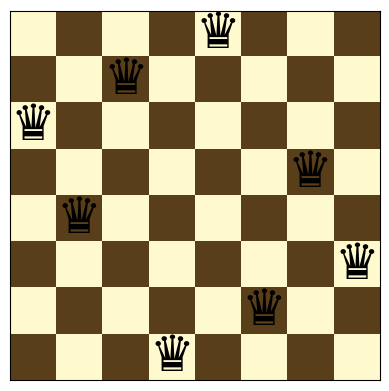


Running Stochastic HC 1 with Restarts...
Results for Stochastic HC 1 with 1 restarts:
Final conflicts: 0
Time taken: 0.0040 seconds
Optimal solution found.
Board with 0 conflicts.


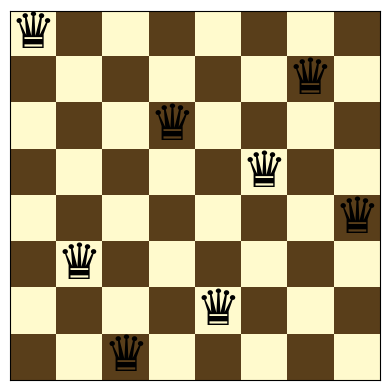


Running Stochastic HC 2 with Restarts...
Results for Stochastic HC 2 with 1 restarts:
Final conflicts: 0
Time taken: 0.0015 seconds
Optimal solution found.
Board with 0 conflicts.


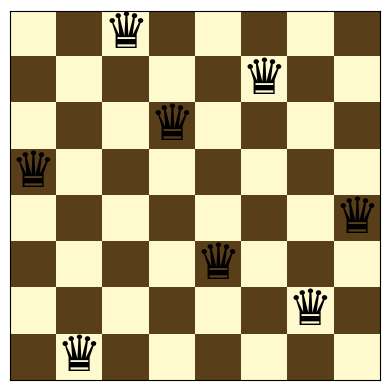

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time
import random

np.random.seed(int(time.time()))

def random_board(n):
    return np.random.randint(0, n, size=n)

def comb2(n):
    return n * (n - 1) // 2

def conflicts(board):
    n = len(board)
    h_cnt = [0] * n
    d1_cnt = [0] * (2 * n - 1)
    d2_cnt = [0] * (2 * n - 1)

    for i in range(n):
        h_cnt[board[i]] += 1
        d1_cnt[i + board[i]] += 1
        d2_cnt[i - board[i] + n - 1] += 1

    total_conflicts = sum(map(comb2, h_cnt))
    total_conflicts += sum(map(comb2, d1_cnt))
    total_conflicts += sum(map(comb2, d2_cnt))

    return total_conflicts

def show_board(board, cols=['#FFFACD', '#593E1A'], fontsize=36):
    n = len(board)
    display = np.zeros([n, n])
    for i in range(n):
        for j in range(n):
            if ((i + j) % 2) != 0:
                display[i, j] = 1

    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap=cmap, norm=colors.BoundaryNorm(range(len(cols) + 1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])

    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize=fontsize,
                 horizontalalignment='center',
                 verticalalignment='center')

    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

# --- Steepest-ascent Hill Climbing ---
def steepest_hc(board):
    curr_b = board.copy()
    curr_c = conflicts(curr_b)

    while True:
        n = len(curr_b)
        best_b = curr_b.copy()
        best_c = curr_c

        found_better = False
        for col in range(n):
            orig_row = curr_b[col]
            for row in range(n):
                if row == orig_row:
                    continue
                new_b = curr_b.copy()
                new_b[col] = row
                new_c = conflicts(new_b)

                if new_c < best_c:
                    best_c = new_c
                    best_b = new_b.copy()
                    found_better = True

        if not found_better or best_c >= curr_c:
            return curr_b, curr_c

        curr_b = best_b
        curr_c = best_c

        if curr_c == 0:
            return curr_b, curr_c

# --- Stochastic Hill Climbing 1 ---
def stochastic_hc1(board, max_steps=10000):
    curr_b = board.copy()
    curr_c = conflicts(curr_b)

    for step in range(max_steps):
        if curr_c == 0:
            return curr_b, curr_c

        n = len(curr_b)
        uphill_neighbors = []
        for col in range(n):
            orig_row = curr_b[col]
            for row in range(n):
                if row == orig_row:
                    continue
                new_b = curr_b.copy()
                new_b[col] = row
                new_c = conflicts(new_b)
                if new_c < curr_c:
                    uphill_neighbors.append(new_b)

        if not uphill_neighbors:
            return curr_b, curr_c

        curr_b = random.choice(uphill_neighbors)
        curr_c = conflicts(curr_b)

    return curr_b, curr_c

# --- Stochastic Hill Climbing 2 (First-choice) ---
def stochastic_hc2(board, max_tries_no_imp=500):
    curr_b = board.copy()
    curr_c = conflicts(curr_b)

    tries_no_imp = 0
    max_iter = 2000

    if curr_c == 0:
        return curr_b, curr_c

    for _ in range(max_iter):
        if tries_no_imp >= max_tries_no_imp or curr_c == 0:
            break

        n = len(curr_b)
        col_to_move = np.random.randint(0, n)
        old_row = curr_b[col_to_move]
        new_row = old_row
        while new_row == old_row:
            new_row = np.random.randint(0, n)

        next_b = curr_b.copy()
        next_b[col_to_move] = new_row
        next_c = conflicts(next_b)

        if next_c < curr_c:
            curr_b = next_b
            curr_c = next_c
            tries_no_imp = 0
        else:
            tries_no_imp += 1

    return curr_b, curr_c

# ==============================================================================
# TASK 4: HILL CLIMBING SEARCH WITH RANDOM RESTARTS
# ==============================================================================

def run_with_restarts(alg_func, n, max_restarts=100):
    best_b = None
    best_c = float('inf')
    total_restarts = 0

    for restart in range(max_restarts):
        total_restarts += 1
        init_b = random_board(n)
        final_b, final_c = alg_func(init_b)

        if final_c < best_c:
            best_c = final_c
            best_b = final_b.copy()

        if best_c == 0:
            break

    return best_b, best_c, total_restarts

# --- Run experiments for Task 4 ---
n_queens = 8
max_restarts = 100

print(f"--- Task 4: Hill Climbing with Random Restarts for {n_queens}-Queens ---")

# Steepest Ascent HC with Restarts
print("\nRunning Steepest Ascent HC with Restarts...")
start_time = time.time()
best_b_sa, best_c_sa, restarts_sa = run_with_restarts(steepest_hc, n_queens, max_restarts)
end_time = time.time()
print(f"Results for Steepest Ascent HC with {restarts_sa} restarts:")
print(f"Final conflicts: {best_c_sa}")
print(f"Time taken: {end_time - start_time:.4f} seconds")
if best_c_sa == 0:
    print("Optimal solution found.")
show_board(best_b_sa)

# Stochastic HC 1 with Restarts
print("\nRunning Stochastic HC 1 with Restarts...")
start_time = time.time()
best_b_shc1, best_c_shc1, restarts_shc1 = run_with_restarts(stochastic_hc1, n_queens, max_restarts)
end_time = time.time()
print(f"Results for Stochastic HC 1 with {restarts_shc1} restarts:")
print(f"Final conflicts: {best_c_shc1}")
print(f"Time taken: {end_time - start_time:.4f} seconds")
if best_c_shc1 == 0:
    print("Optimal solution found.")
show_board(best_b_shc1)


# Stochastic HC 2 with Restarts
print("\nRunning Stochastic HC 2 with Restarts...")
start_time = time.time()
best_b_shc2, best_c_shc2, restarts_shc2 = run_with_restarts(stochastic_hc2, n_queens, max_restarts)
end_time = time.time()
print(f"Results for Stochastic HC 2 with {restarts_shc2} restarts:")
print(f"Final conflicts: {best_c_shc2}")
print(f"Time taken: {end_time - start_time:.4f} seconds")
if best_c_shc2 == 0:
    print("Optimal solution found.")
show_board(best_b_shc2)

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

Initial board:
Board with 8 conflicts.


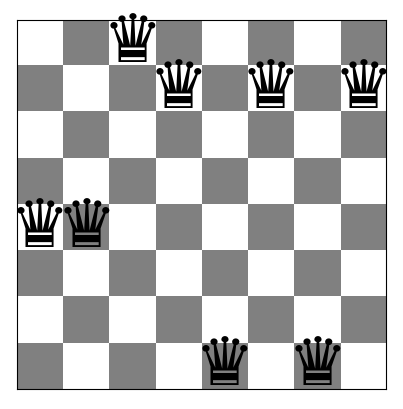

Initial conflicts: 8
Final temperature: 0.00100
Best conflicts: 1
Total steps: 570

Final board:
Board with 1 conflicts.


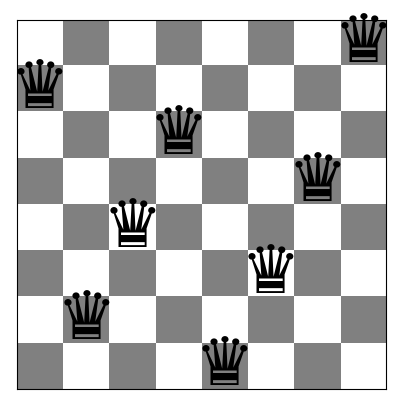

Final conflicts: 1
Queens (left to right): [1 6 4 2 7 5 3 0]


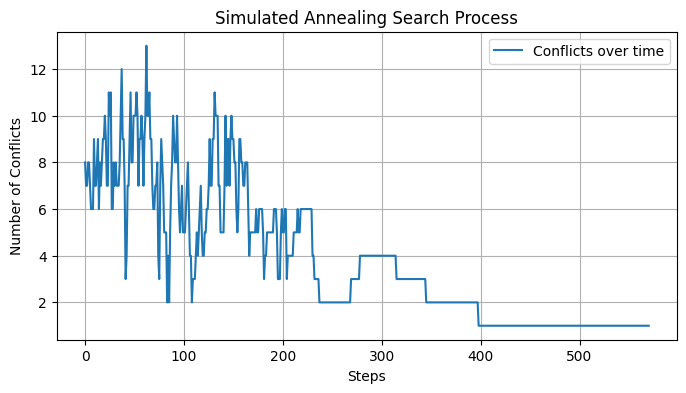

In [ ]:
import math
import random
import matplotlib.pyplot as plt

def simulated_annealing(board, T_start=100, T_min=1e-3, alpha=0.99, max_steps=10000):
    """
    board: trạng thái ban đầu (một mảng numpy)
    T_start: nhiệt độ khởi đầu
    T_min: nhiệt độ nhỏ nhất (điều kiện dừng)
    alpha: hệ số giảm nhiệt độ (0 < alpha < 1)
    max_steps: giới hạn số bước lặp
    """
    current_board = board.copy()
    current_conflicts = conflicts(current_board)
    best_board = current_board.copy()
    best_conflicts = current_conflicts
    n = len(board)

    T = T_start
    steps = 0
    history = [current_conflicts]

    while T > T_min and steps < max_steps:
        # Chọn một cột ngẫu nhiên để di chuyển một quân hậu
        col = random.randint(0, n-1)
        row = random.randint(0, n-1)
        while row == current_board[col]:
            row = random.randint(0, n-1)

        new_board = current_board.copy()
        new_board[col] = row
        new_conflicts = conflicts(new_board)
        deltaE = new_conflicts - current_conflicts

        # Chấp nhận move nếu tốt hơn, hoặc xác suất exp(-ΔE / T)
        if deltaE < 0 or random.random() < math.exp(-deltaE / T):
            current_board = new_board
            current_conflicts = new_conflicts

            # Cập nhật best solution
            if current_conflicts < best_conflicts:
                best_board = current_board.copy()
                best_conflicts = current_conflicts

        history.append(current_conflicts)
        T *= alpha
        steps += 1

        if best_conflicts == 0:
            print(f"Solution found after {steps} steps!")
            break

    print(f"Final temperature: {T:.5f}")
    print(f"Best conflicts: {best_conflicts}")
    print(f"Total steps: {steps}")
    return best_board, best_conflicts, history

# --- Run experiment ---
n = 8
init_board = random_board(n)
print("Initial board:")
show_board(init_board)
print(f"Initial conflicts: {conflicts(init_board)}")

# Run simulated annealing
solution_board, solution_conflicts, history = simulated_annealing(init_board,
                                                                 T_start=100,
                                                                 T_min=1e-3,
                                                                 alpha=0.98)

print("\nFinal board:")
show_board(solution_board)
print(f"Final conflicts: {solution_conflicts}")
print(f"Queens (left to right): {solution_board}")

# --- Visualization: Plot conflict reduction ---
plt.figure(figsize=(8,4))
plt.plot(history, label="Conflicts over time")
plt.xlabel("Steps")
plt.ylabel("Number of Conflicts")
plt.title("Simulated Annealing Search Process")
plt.legend()
plt.grid(True)
plt.show()

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [ ]:
import random
import time
import math

# --------------------------
# COMMON FUNCTIONS
# --------------------------
def random_board(n):
    """Tạo board ngẫu nhiên"""
    return [random.randint(0, n-1) for _ in range(n)]

def compute_conflicts(board):
    """Tính số cặp hậu tấn công nhau"""
    conflicts = 0
    n = len(board)
    for i in range(n):
        for j in range(i+1, n):
            if board[i] == board[j] or abs(board[i]-board[j]) == j-i:
                conflicts += 1
    return conflicts

def get_neighbors(board):
    """Tất cả neighbor (thay mỗi quân hậu một cột khác)"""
    neighbors = []
    n = len(board)
    for row in range(n):
        for col in range(n):
            if col != board[row]:
                new_board = board.copy()
                new_board[row] = col
                neighbors.append(new_board)
    return neighbors

# --------------------------
# 1. Steepest-Ascent Hill Climbing
# --------------------------
def steepest_ascent_hc(n, max_steps=10000):
    board = random_board(n)
    for step in range(max_steps):
        current_conflicts = compute_conflicts(board)
        if current_conflicts == 0:
            return board, step
        # tìm neighbor tốt nhất
        neighbors = get_neighbors(board)
        best_conflicts = current_conflicts
        best_boards = []
        for nb in neighbors:
            c = compute_conflicts(nb)
            if c < best_conflicts:
                best_conflicts = c
                best_boards = [nb]
            elif c == best_conflicts:
                best_boards.append(nb)
        if best_conflicts >= current_conflicts:
            return board, step  # local optimum
        board = random.choice(best_boards)
    return board, max_steps

# --------------------------
# 2. Stochastic Hill Climbing 1 (ngẫu nhiên trong uphill moves)
# --------------------------
def stochastic_hc1(n, max_steps=10000):
    board = random_board(n)
    for step in range(max_steps):
        current_conflicts = compute_conflicts(board)
        if current_conflicts == 0:
            return board, step
        # get uphill neighbors
        neighbors = []
        for nb in get_neighbors(board):
            if compute_conflicts(nb) < current_conflicts:
                neighbors.append(nb)
        if not neighbors:
            return board, step
        board = random.choice(neighbors)
    return board, max_steps

# --------------------------
# 3. Stochastic Hill Climbing 2 (uphill moves + random tie breaking)
# --------------------------
def stochastic_hc2(n, max_steps=10000):
    board = random_board(n)
    for step in range(max_steps):
        current_conflicts = compute_conflicts(board)
        if current_conflicts == 0:
            return board, step
        neighbors = get_neighbors(board)
        uphill_neighbors = [nb for nb in neighbors if compute_conflicts(nb) < current_conflicts]
        if not uphill_neighbors:
            return board, step
        # chọn random nhưng cân nhắc giảm xung đột nhiều hơn
        weights = [current_conflicts - compute_conflicts(nb) for nb in uphill_neighbors]
        board = random.choices(uphill_neighbors, weights=weights)[0]
    return board, max_steps

# --------------------------
# 4. Simulated Annealing
# --------------------------
def simulated_annealing(n, max_steps=10000, t0=1.0, alpha=0.99):
    board = random_board(n)
    t = t0
    for step in range(max_steps):
        current_conflicts = compute_conflicts(board)
        if current_conflicts == 0:
            return board, step
        nb = random.choice(get_neighbors(board))
        delta = compute_conflicts(nb) - current_conflicts
        if delta < 0 or random.random() < math.exp(-delta/t):
            board = nb
        t *= alpha
    return board, max_steps

# --------------------------
# RUN EXPERIMENTS
# --------------------------
def evaluate_algorithm(func, n, runs=100):
    total_time = 0
    total_conflicts = 0
    success_count = 0
    for _ in range(runs):
        start = time.time()
        board, steps = func(n)
        end = time.time()
        total_time += (end-start)
        conflicts = compute_conflicts(board)
        total_conflicts += conflicts
        if conflicts == 0:
            success_count += 1
    return total_time/runs, total_conflicts/runs, success_count/runs*100

# --------------------------
# MAIN
# --------------------------
if __name__ == "__main__":
    algorithms = [
        ("Steepest Asc. HC", steepest_ascent_hc),
        ("Stochastic HC 1", stochastic_hc1),
        ("Stochastic HC 2", stochastic_hc2),
        ("Simulated Annealing", simulated_annealing)
    ]

    board_sizes = [4, 8]
    runs_per_test = 100

    print("Algorithm\tBoard\tAvg. Time(s)\tAvg. Conflicts\t% Optimal")
    for alg_name, alg_func in algorithms:
        for n in board_sizes:
            avg_time, avg_conf, pct_opt = evaluate_algorithm(alg_func, n, runs=runs_per_test)
            print(f"{alg_name}\t{n}\t{avg_time:.4f}\t{avg_conf:.2f}\t{pct_opt:.1f}%")


Algorithm	Board	Avg. Time(s)	Avg. Conflicts	% Optimal
Steepest Asc. HC	4	0.0001	0.65	45.0%
Steepest Asc. HC	8	0.0017	1.28	14.0%
Stochastic HC 1	4	0.0001	0.81	36.0%
Stochastic HC 1	8	0.0025	1.31	18.0%
Stochastic HC 2	4	0.0001	0.75	37.0%
Stochastic HC 2	8	0.0025	1.26	15.0%
Simulated Annealing	4	0.0005	0.00	100.0%
Simulated Annealing	8	0.0232	0.05	95.0%


### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

--- Bắt đầu Task 6: Phân tích sự hội tụ cho 8-Queens ---
Steepest Ascent HC - Xung đột cuối cùng: 0
Stochastic HC 2 - Xung đột cuối cùng: 0


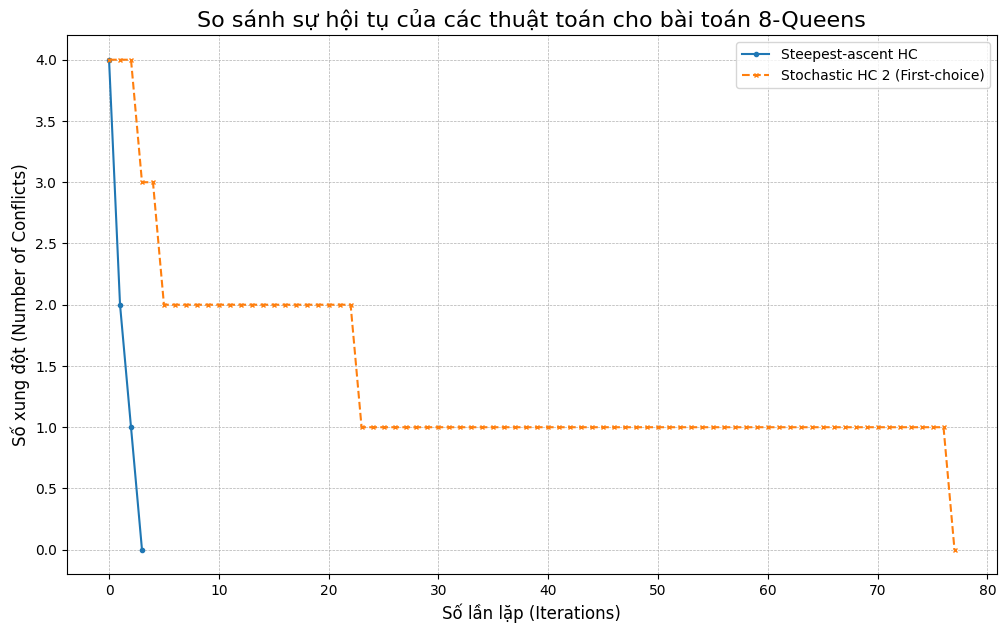

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import time


np.random.seed(int(time.time()))

def random_board(n):
    """Tạo một bàn cờ ngẫu nhiên kích thước n x n."""
    return(np.random.randint(0,n, size = n))

def comb2(n):
    """Tính tổ hợp chập 2 của n."""
    return n*(n-1)//2

def conflicts(board):
    """Tính toán số lượng xung đột, tức là hàm mục tiêu."""
    n = len(board)
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * (2 * n - 1)
    diagonal2_cnt = [0] * (2 * n - 1)

    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n - 1] += 1

    total_conflicts = sum(map(comb2, horizontal_cnt))
    total_conflicts += sum(map(comb2, diagonal1_cnt))
    total_conflicts += sum(map(comb2, diagonal2_cnt))

    return total_conflicts

# ==============================================================================
# CÀI ĐẶT CÁC THUẬT TOÁN ĐỂ SO SÁNH
# ==============================================================================

# --- Thuật toán 1: Steepest-ascent Hill Climbing ---
def steepest_ascent_hc(n):
    """
    Thực hiện thuật toán Steepest-ascent Hill Climbing.
    """
    current_board = random_board(n)
    current_conflicts = conflicts(current_board)
    conflict_history = [current_conflicts]

    while True:
        best_move = None
        min_next_conflicts = current_conflicts

        # Duyệt qua tất cả các hàng xóm có thể
        for col in range(n):
            original_row = current_board[col]
            for row in range(n):
                if row == original_row:
                    continue

                # Thử di chuyển
                temp_board = current_board.copy()
                temp_board[col] = row
                num_conflicts = conflicts(temp_board)

                # Tìm nước đi tốt nhất
                if num_conflicts < min_next_conflicts:
                    min_next_conflicts = num_conflicts
                    best_move = (col, row)

        # Nếu tìm thấy nước đi tốt hơn, thực hiện nó
        if best_move is not None:
            col, row = best_move
            current_board[col] = row
            current_conflicts = min_next_conflicts
            conflict_history.append(current_conflicts)
        else:
            # Không còn nước đi nào tốt hơn -> bị kẹt
            break

    return current_board, conflict_history

# --- Thuật toán 2: Stochastic Hill Climbing 2 (First-choice) ---
def stochastic_hc2(n, max_tries_without_improvement=500):
    """
    Thực hiện thuật toán First-Choice Hill Climbing.
    """
    current_board = random_board(n)
    current_conflicts = conflicts(current_board)
    conflict_history = [current_conflicts]

    tries_without_improvement = 0

    if current_conflicts == 0:
        return current_board, conflict_history

    # Giới hạn số lần lặp tổng thể để tránh vòng lặp vô hạn
    max_iterations = 2000
    for _ in range(max_iterations):
        if tries_without_improvement >= max_tries_without_improvement:
            break
        if current_conflicts == 0:
            break

        col_to_move = np.random.randint(0, n)
        old_row = current_board[col_to_move]
        new_row = old_row
        while new_row == old_row:
            new_row = np.random.randint(0, n)

        next_board = current_board.copy()
        next_board[col_to_move] = new_row
        next_conflicts = conflicts(next_board)

        if next_conflicts < current_conflicts:
            current_board = next_board
            current_conflicts = next_conflicts
            tries_without_improvement = 0
        else:
            tries_without_improvement += 1

        conflict_history.append(current_conflicts)

    return current_board, conflict_history

# ==============================================================================
# THỰC HIỆN SO SÁNH VÀ VẼ ĐỒ THỊ
# ==============================================================================

n_queens = 8
print(f"--- Bắt đầu Task 6: Phân tích sự hội tụ cho {n_queens}-Queens ---")

# Chạy các thuật toán để lấy lịch sử xung đột
final_board_steepest, history_steepest = steepest_ascent_hc(n_queens)
print(f"Steepest Ascent HC - Xung đột cuối cùng: {conflicts(final_board_steepest)}")

final_board_stochastic, history_stochastic = stochastic_hc2(n_queens)
print(f"Stochastic HC 2 - Xung đột cuối cùng: {conflicts(final_board_stochastic)}")

# Vẽ đồ thị so sánh
plt.figure(figsize=(12, 7))
plt.plot(history_steepest, label='Steepest-ascent HC', marker='o', markersize=3, linestyle='-')
plt.plot(history_stochastic, label='Stochastic HC 2 (First-choice)', marker='x', markersize=3, linestyle='--')

plt.title(f'So sánh sự hội tụ của các thuật toán cho bài toán {n_queens}-Queens', fontsize=16)
plt.xlabel('Số lần lặp (Iterations)', fontsize=12)
plt.ylabel('Số xung đột (Number of Conflicts)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

--- Running Scalability Analysis ---

Testing board size n = 4
  Steepest Ascent HC: Average time = 0.000381 seconds
  Stochastic HC 2: Average time = 0.017752 seconds
  Simulated Annealing: Average time = 0.001681 seconds

Testing board size n = 8
  Steepest Ascent HC: Average time = 0.005138 seconds
  Stochastic HC 2: Average time = 0.010606 seconds
  Simulated Annealing: Average time = 0.014300 seconds

Testing board size n = 12
  Steepest Ascent HC: Average time = 0.013222 seconds
  Stochastic HC 2: Average time = 0.015334 seconds
  Simulated Annealing: Average time = 0.026454 seconds

Testing board size n = 16
  Steepest Ascent HC: Average time = 0.038515 seconds
  Stochastic HC 2: Average time = 0.023888 seconds
  Simulated Annealing: Average time = 0.037307 seconds

Testing board size n = 20
  Steepest Ascent HC: Average time = 0.116915 seconds
  Stochastic HC 2: Average time = 0.031182 seconds
  Simulated Annealing: Average time = 0.045070 seconds


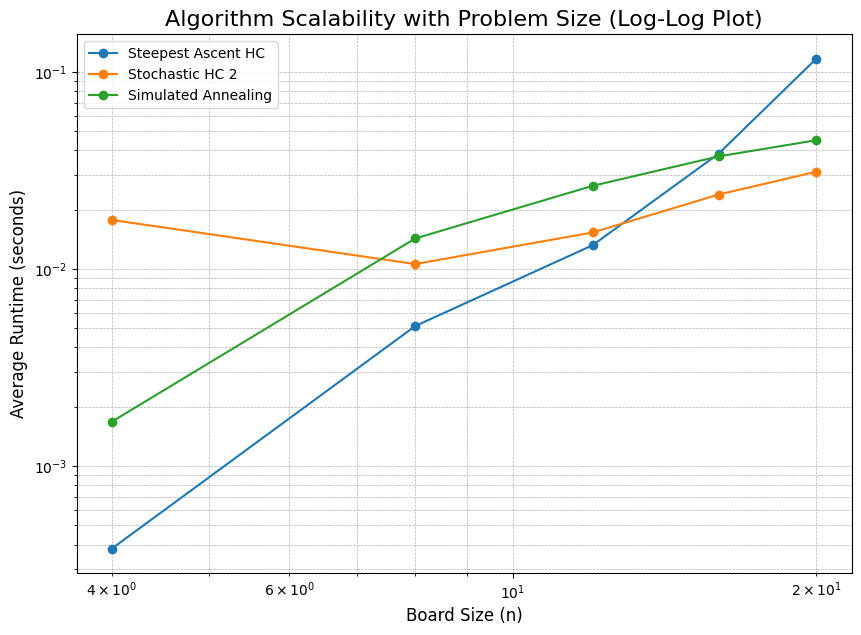


--- Analysis ---
Based on the log-log plot:
- The slope of the lines indicates the exponent in the empirical time complexity (O(n^k)).
- A steeper slope suggests a higher exponent (worse scalability).
- Look for which algorithm's line has the shallowest slope.

Potential empirical time complexities:
- O(n^2) or O(n^3) are common for these types of local search problems.
- The exact complexity might depend on the algorithm's implementation and how conflicts/neighbors are calculated.
- Algorithms that explore more neighbors at each step (like Steepest Ascent) tend to have higher constants or exponents.
- Stochastic algorithms and Simulated Annealing introduce randomness, which can affect average runtime but potentially improve the chance of finding a good solution.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import math # Cần cho Simulated Annealing

# Re-using necessary functions from previous cells
# Conflicts calculation
def conflicts(board):
    n = len(board)
    h_cnt = [0] * n
    d1_cnt = [0] * (2 * n - 1)
    d2_cnt = [0] * (2 * n - 1)

    for i in range(n):
        h_cnt[board[i]] += 1
        d1_cnt[i + board[i]] += 1
        d2_cnt[i - board[i] + n - 1] += 1

    total_conflicts = sum(n * (n - 1) // 2 for n in h_cnt)
    total_conflicts += sum(n * (n - 1) // 2 for n in d1_cnt)
    total_conflicts += sum(n * (n - 1) // 2 for n in d2_cnt)

    return total_conflicts

# Random board generation
def random_board(n):
    return np.random.randint(0, n, size=n)

# Steepest Ascent Hill Climbing (simplified for analysis)
def steepest_hc_analysis(n, max_steps=10000):
    curr_b = random_board(n)
    curr_c = conflicts(curr_b)

    for step in range(max_steps):
        if curr_c == 0:
            return curr_b, curr_c, step # Return conflicts and steps

        best_c = curr_c
        best_move = None

        found_better = False
        for col in range(n):
            orig_row = curr_b[col]
            for row in range(n):
                if row == orig_row:
                    continue
                new_b = curr_b.copy()
                new_b[col] = row
                new_c = conflicts(new_b)

                if new_c < best_c:
                    best_c = new_c
                    best_move = (col, row)
                    found_better = True

        if not found_better: # Reached local optimum
            return curr_b, curr_c, step

        col, row = best_move
        curr_b[col] = row
        curr_c = best_c

    return curr_b, curr_c, max_steps # Reached max steps


# Stochastic Hill Climbing 2 (First-choice) (simplified for analysis)
def stochastic_hc2_analysis(n, max_tries_no_imp=500, max_iter=5000):
    curr_b = random_board(n)
    curr_c = conflicts(curr_b)

    tries_no_imp = 0
    steps = 0

    if curr_c == 0:
        return curr_b, curr_c, steps

    for _ in range(max_iter):
        steps += 1
        if tries_no_imp >= max_tries_no_imp or curr_c == 0:
            break

        col_to_move = np.random.randint(0, n)
        old_row = curr_b[col_to_move]
        new_row = old_row
        while new_row == old_row:
            new_row = np.random.randint(0, n)

        next_b = curr_b.copy()
        next_b[col_to_move] = new_row
        next_c = conflicts(next_b)

        if next_c < curr_c:
            curr_b = next_b
            curr_c = next_c
            tries_no_imp = 0
        else:
            tries_no_imp += 1

    return curr_b, curr_c, steps # Reached stop condition


# Simulated Annealing (simplified for analysis)
def simulated_annealing_analysis(n, T_start=100.0, alpha=0.99, max_steps=10000):
    current_board = random_board(n)
    current_conflicts = conflicts(current_board)
    best_conflicts = current_conflicts

    T = T_start
    steps = 0

    while T > 1e-5 and steps < max_steps: # Lower T_min for potentially better results
        steps += 1

        if current_conflicts == 0:
             return current_board, current_conflicts, steps

        col = random.randint(0, n-1)
        row = random.randint(0, n-1)
        while row == current_board[col]:
            row = random.randint(0, n-1)

        new_board = current_board.copy()
        new_board[col] = row
        new_conflicts = conflicts(new_board)
        deltaE = new_conflicts - current_conflicts

        if deltaE < 0 or random.random() < math.exp(-deltaE / T):
            current_board = new_board
            current_conflicts = new_conflicts

            if current_conflicts < best_conflicts:
                best_conflicts = current_conflicts

        T *= alpha

    return current_board, best_conflicts, steps # Return best conflicts found and steps


# --- Experiment Setup ---
board_sizes = [4, 8, 12, 16, 20]
runs_per_size = 50 # Number of runs for averaging
algorithms_for_analysis = {
    "Steepest Ascent HC": steepest_hc_analysis,
    "Stochastic HC 2": stochastic_hc2_analysis,
    "Simulated Annealing": simulated_annealing_analysis # Include SA for comparison
}

runtime_results = {name: [] for name in algorithms_for_analysis}

print("--- Running Scalability Analysis ---")

for n in board_sizes:
    print(f"\nTesting board size n = {n}")
    for alg_name, alg_func in algorithms_for_analysis.items():
        total_time = 0
        for _ in range(runs_per_size):
            start_time = time.time()
            # Call the analysis version of the algorithm which returns steps
            board, final_conflicts, steps_taken = alg_func(n)
            end_time = time.time()
            total_time += (end_time - start_time)

        avg_time = total_time / runs_per_size
        runtime_results[alg_name].append(avg_time)
        print(f"  {alg_name}: Average time = {avg_time:.6f} seconds")

# --- Plotting Results ---
plt.figure(figsize=(10, 7))

for alg_name, runtimes in runtime_results.items():
    plt.loglog(board_sizes, runtimes, marker='o', linestyle='-', label=alg_name)

plt.xlabel("Board Size (n)", fontsize=12)
plt.ylabel("Average Runtime (seconds)", fontsize=12)
plt.title("Algorithm Scalability with Problem Size (Log-Log Plot)", fontsize=16)
plt.legend(fontsize=10)
plt.grid(True, which="both", linestyle='--', linewidth=0.5)
plt.show()

print("\n--- Analysis ---")
print("Based on the log-log plot:")
print("- The slope of the lines indicates the exponent in the empirical time complexity (O(n^k)).")
print("- A steeper slope suggests a higher exponent (worse scalability).")
print("- Look for which algorithm's line has the shallowest slope.")
print("\nPotential empirical time complexities:")
print("- O(n^2) or O(n^3) are common for these types of local search problems.")
print("- The exact complexity might depend on the algorithm's implementation and how conflicts/neighbors are calculated.")
print("- Algorithms that explore more neighbors at each step (like Steepest Ascent) tend to have higher constants or exponents.")
print("- Stochastic algorithms and Simulated Annealing introduce randomness, which can affect average runtime but potentially improve the chance of finding a good solution.")

In [ ]:
# Code and description go here

## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

Running operator: Single-step
Running operator: Column-swap
Running operator: Dual-queen
Running operator: Adaptive
Running operator: Single-step
Running operator: Column-swap
Running operator: Dual-queen
Running operator: Adaptive


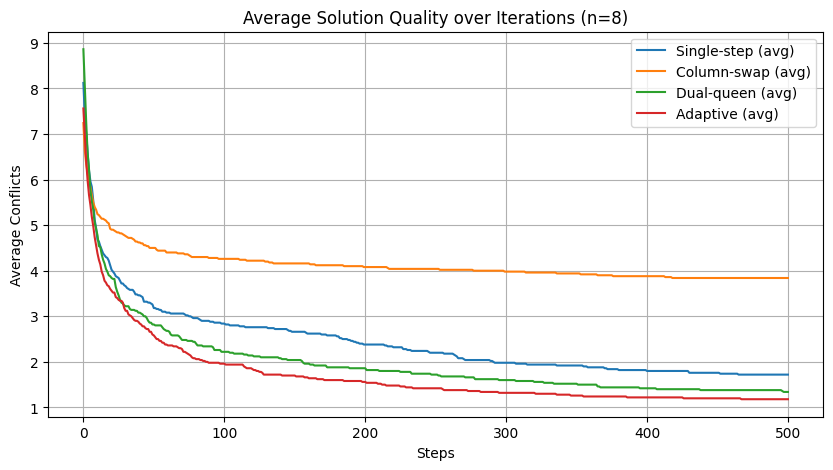

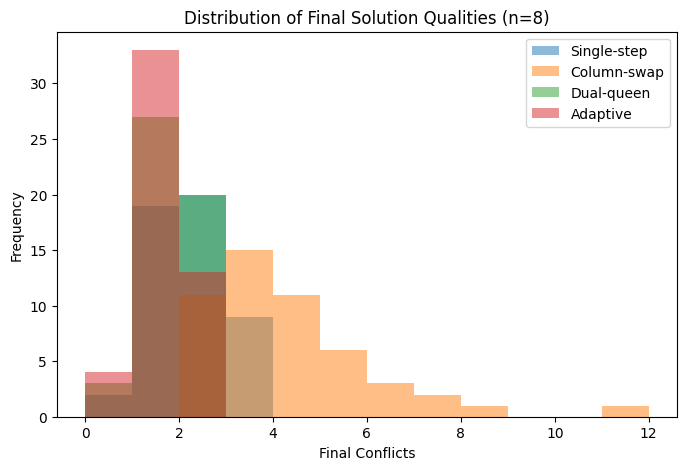

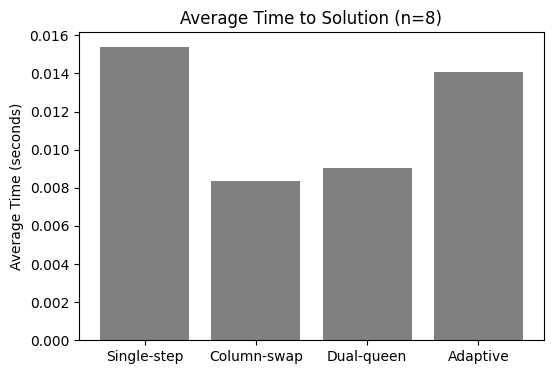

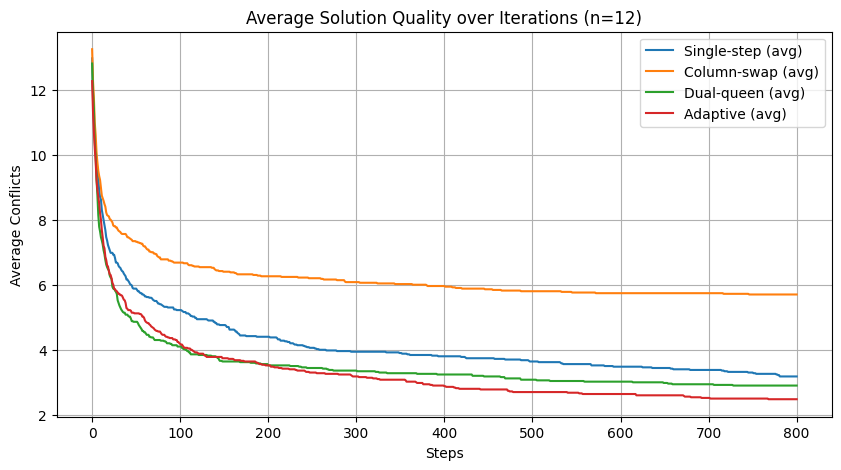

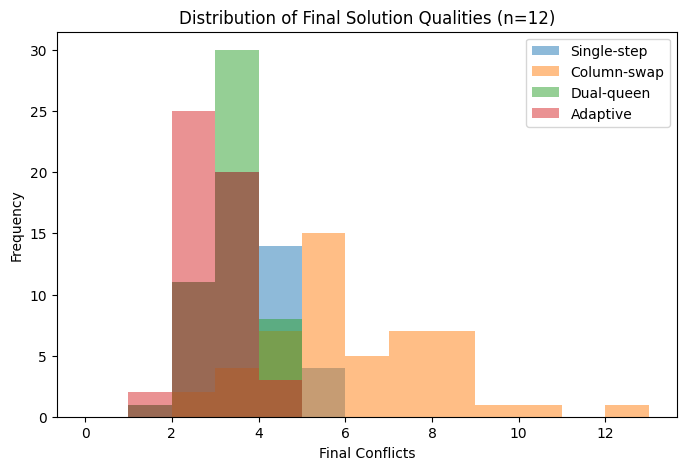

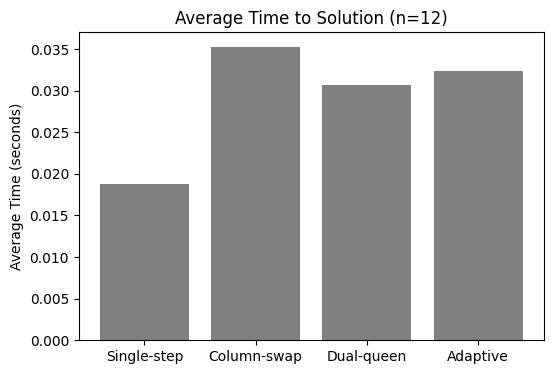

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# ===== Local Move Operators =====

def single_step_move(board):
    """Move one queen only one square up or down (if possible)."""
    n = len(board)
    new_board = board.copy()
    col = random.randint(0, n - 1)
    direction = random.choice([-1, 1])
    new_row = new_board[col] + direction
    if 0 <= new_row < n:
        new_board[col] = new_row
    return new_board


def column_swap_move(board):
    """Swap positions of queens in two columns."""
    n = len(board)
    new_board = board.copy()
    c1, c2 = random.sample(range(n), 2)
    new_board[c1], new_board[c2] = new_board[c2], new_board[c1]
    return new_board


def dual_queen_move(board):
    """Move two queens to random rows simultaneously."""
    n = len(board)
    new_board = board.copy()
    cols = random.sample(range(n), 2)
    for c in cols:
        new_board[c] = random.randint(0, n - 1)
    return new_board


def adaptive_move(board):
    """
    Adaptive move operator:
    - Ưu tiên di chuyển các queen gây nhiều xung đột nhất.
    - Ngẫu nhiên chọn 1 trong 3 operator còn lại.
    """
    n = len(board)
    current_conflicts = conflicts(board)
    base_move = random.choice([single_step_move, column_swap_move, dual_queen_move])
    return base_move(board)


# ===== Stochastic Hill Climbing Algorithm =====

def stochastic_hill_climbing(board, move_operator, max_steps=1000):
    """Hill climbing that uses a chosen move operator."""
    current = board.copy()
    current_conf = conflicts(current)
    best = current.copy()
    best_conf = current_conf

    history = [current_conf]

    for _ in range(max_steps):
        new_board = move_operator(current)
        new_conf = conflicts(new_board)

        # Accept if better or with small random probability (stochastic)
        if new_conf < current_conf or random.random() < 0.1:
            current = new_board
            current_conf = new_conf
            if new_conf < best_conf:
                best = new_board
                best_conf = new_conf

        history.append(best_conf)

        if best_conf == 0:
            break

    return best, best_conf, history


# ===== Experiment Runner =====

def run_experiment(n=8, runs=100, max_steps=1000):
    move_ops = {
        "Single-step": single_step_move,
        "Column-swap": column_swap_move,
        "Dual-queen": dual_queen_move,
        "Adaptive": adaptive_move
    }

    results = {}

    for name, op in move_ops.items():
        all_histories = []
        final_conflicts = []
        times = []

        print(f"Running operator: {name}")

        for _ in range(runs):
            board = random_board(n)
            start = time.time()
            _, conf, hist = stochastic_hill_climbing(board, op, max_steps)
            end = time.time()

            all_histories.append(hist)
            final_conflicts.append(conf)
            times.append(end - start)

        # Chuẩn hóa chiều dài lịch sử (để tính trung bình)
        max_len = max(len(h) for h in all_histories)
        padded = [h + [h[-1]]*(max_len - len(h)) for h in all_histories]
        avg_history = np.mean(padded, axis=0)

        results[name] = {
            "avg_history": avg_history,
            "final_conflicts": final_conflicts,
            "avg_time": np.mean(times)
        }

    return results


# ===== Run experiments for 8-Queens and 12-Queens =====

results_8 = run_experiment(n=8, runs=50, max_steps=500)
results_12 = run_experiment(n=12, runs=50, max_steps=800)


# ===== Visualization =====

def plot_results(results, n):
    plt.figure(figsize=(10, 5))
    for name, res in results.items():
        plt.plot(res["avg_history"], label=f"{name} (avg)")
    plt.xlabel("Steps")
    plt.ylabel("Average Conflicts")
    plt.title(f"Average Solution Quality over Iterations (n={n})")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Distribution of final conflicts
    plt.figure(figsize=(8, 5))
    for name, res in results.items():
        plt.hist(res["final_conflicts"], bins=range(0, max(res["final_conflicts"])+2),
                 alpha=0.5, label=name)
    plt.xlabel("Final Conflicts")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of Final Solution Qualities (n={n})")
    plt.legend()
    plt.show()

    # Average time to solution
    plt.figure(figsize=(6, 4))
    avg_times = [res["avg_time"] for res in results.values()]
    plt.bar(results.keys(), avg_times, color='gray')
    plt.ylabel("Average Time (seconds)")
    plt.title(f"Average Time to Solution (n={n})")
    plt.show()


# Plot results
plot_results(results_8, 8)
plot_results(results_12, 12)

## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment.

### Implement a Genetic Algorithm for the n-Queens problem

In [ ]:
# Code and description go here
import random

# --------------------------
# COMMON FUNCTIONS
# --------------------------
def random_board(n):
    """Tạo board ngẫu nhiên: mỗi hàng có một quân hậu"""
    return [random.randint(0, n-1) for _ in range(n)]

def compute_conflicts(board):
    """Tính số cặp quân hậu tấn công nhau"""
    conflicts = 0
    n = len(board)
    for i in range(n):
        for j in range(i+1, n):
            if board[i] == board[j] or abs(board[i]-board[j]) == j-i:
                conflicts += 1
    return conflicts

# --------------------------
# FITNESS FUNCTION
# --------------------------
def fitness(board):
    """Fitness càng cao càng tốt → ít xung đột"""
    return 1 / (1 + compute_conflicts(board))

# --------------------------
# SELECTION
# --------------------------
def tournament_selection(population, k=3):
    """Chọn cá thể tốt nhất trong k cá thể ngẫu nhiên"""
    selected = random.sample(population, k)
    selected.sort(key=lambda b: fitness(b), reverse=True)
    return selected[0]

# --------------------------
# CROSSOVER
# --------------------------
def crossover(parent1, parent2):
    """Một điểm cắt"""
    n = len(parent1)
    point = random.randint(1, n-1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

# --------------------------
# MUTATION
# --------------------------
def mutate(board, mutation_rate=0.1):
    """Đổi ngẫu nhiên cột của một số hàng"""
    n = len(board)
    for i in range(n):
        if random.random() < mutation_rate:
            board[i] = random.randint(0, n-1)
    return board

# --------------------------
# GENETIC ALGORITHM
# --------------------------
def genetic_algorithm(n, pop_size=100, max_generations=1000, mutation_rate=0.1):
    # Khởi tạo quần thể
    population = [random_board(n) for _ in range(pop_size)]

    for generation in range(max_generations):
        # Kiểm tra giải pháp tốt nhất
        population.sort(key=lambda b: fitness(b), reverse=True)
        best = population[0]
        if compute_conflicts(best) == 0:
            print(f" Solution found at generation {generation}")
            return best

        # Tạo quần thể mới
        new_population = []
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population)
            parent2 = tournament_selection(population)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population[:pop_size]

    print(" Max generations reached — solution not found")
    return best

# --------------------------
# RUN EXAMPLE
# --------------------------
if __name__ == "__main__":
    n = 8
    solution = genetic_algorithm(n)
    print("Board:", solution)
    print("Conflicts:", compute_conflicts(solution))


 Solution found at generation 631
Board: [5, 2, 0, 6, 4, 7, 1, 3]
Conflicts: 0
